In [1]:
import cv2
import os
import matplotlib.pyplot as plt
from config import LABELS_DIR,IMAGES_DIR
import random

In [2]:
def load_image(filename):
    
    path = os.path.join(IMAGES_DIR,filename)
    img = cv2.imread(path)
    
    return img, img.shape[1], img.shape[0]

In [3]:
def draw_boxes(image, label_path, img_width, img_height):
    
    with open(label_path,'r') as f:
        for line in f:
            cls_id, x_center, y_center, width, height = map(float,line.split())
            
            x_center *= img_width
            y_center *= img_height
            width *= img_width
            height *= img_height
            
            x_min = x_center - width / 2.0
            y_min = y_center - height / 2.0
            x_max = x_center + width / 2.0
            y_max = y_center + height / 2.0
            
            cv2.rectangle(image,(int(x_min), int(y_min)),(int(x_max), int(y_max)), (0,255,0),2)
            
    return image

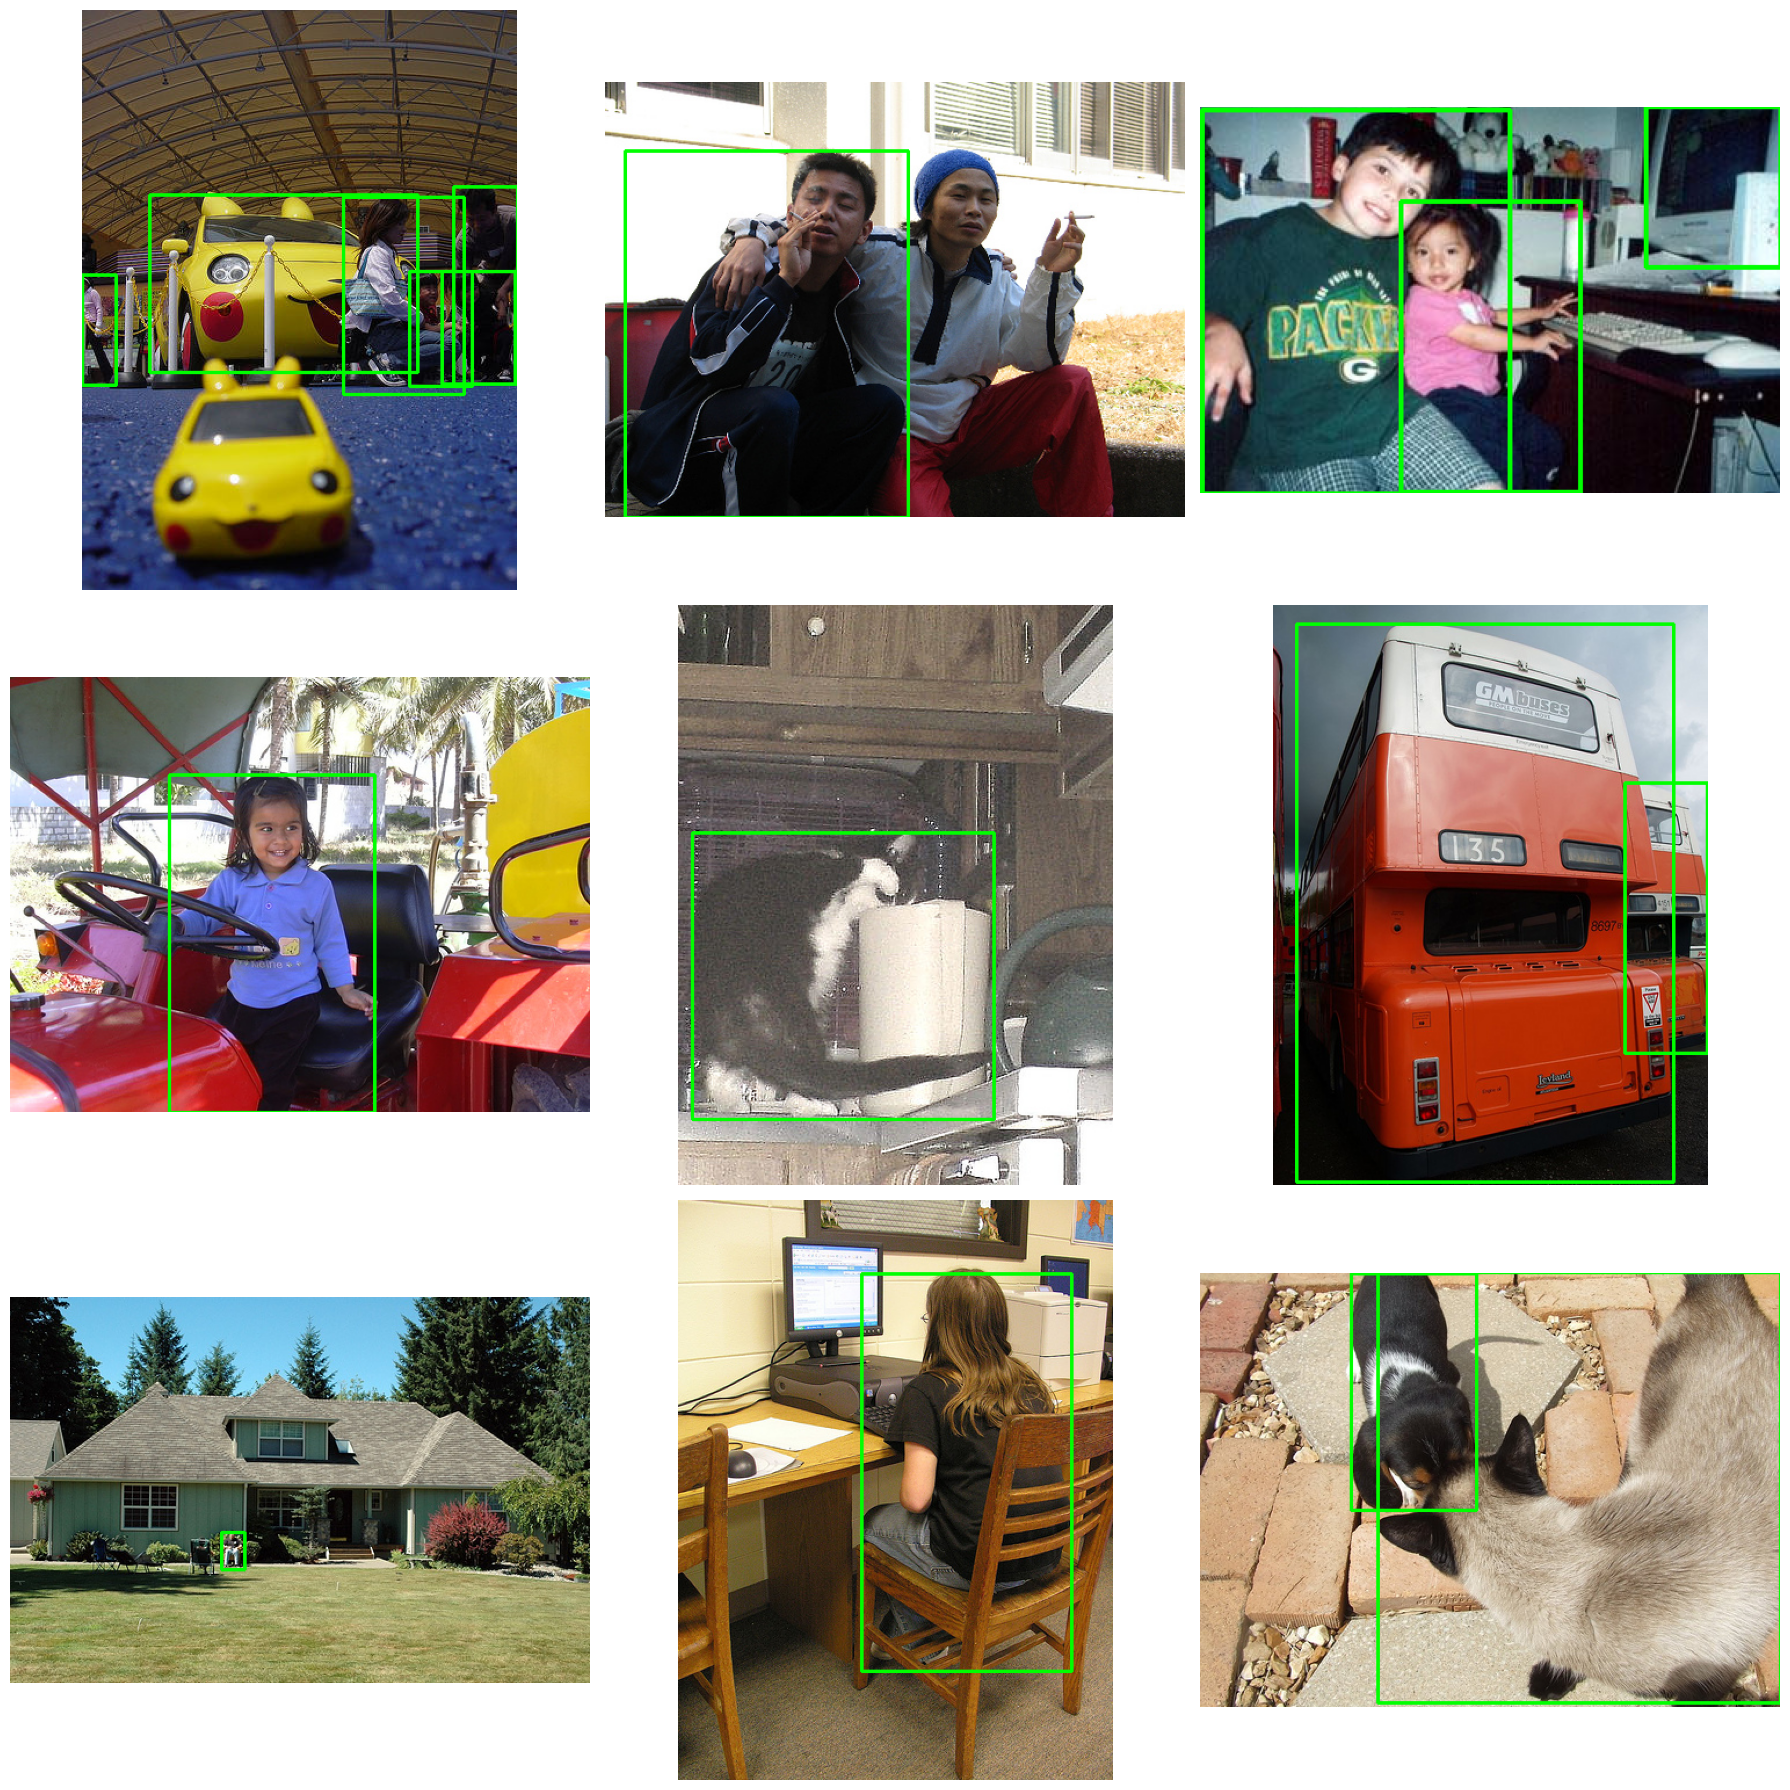

In [5]:
plt.figure(figsize=(18, 18))

for i in range(9):
    sample_filename = random.choice(os.listdir(IMAGES_DIR))
    image, w, h = load_image(sample_filename)

    label_file = os.path.join(LABELS_DIR, sample_filename.replace(".jpg", ".txt"))
    image_with_boxes = draw_boxes(image, label_file, w, h)

    plt.subplot(3,3,i + 1)
    plt.imshow(cv2.cvtColor(image_with_boxes, cv2.COLOR_BGR2RGB))
    plt.axis(False)
    
plt.tight_layout()
plt.show()